[[1, 4], [3], [4], [5, 7], [5, 7], [6], [], []]
['ad', 'cf', 'c', 'be', 'b']
[[1, 4], [3], [4], [5, 7], [5, 7], [6], [], []]


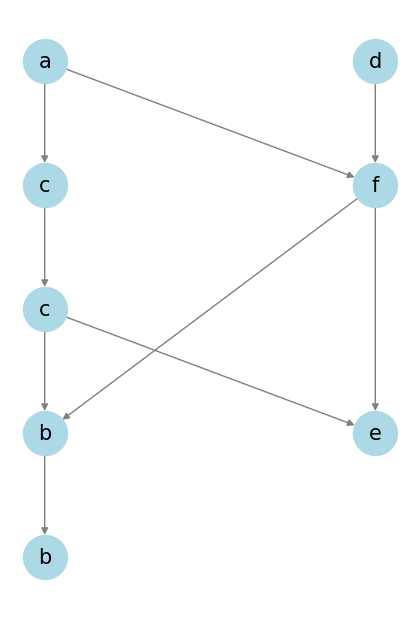

In [11]:
from copy import deepcopy
import networkx as nx
import matplotlib.pyplot as plt
import sys
import os
import re


class Transaction:
    def __init__(self, transaction: str) -> None:
        left, right = transaction.split(":=")
        self.left = left.strip()
        self.rightArray = [s.strip() for s in re.split(
            r'[+\-*/0-9]', right) if s.strip()]


def parseFile(fileName: str) -> tuple[dict[str, Transaction], str]:

    transactions = {}
    for line in open(fileName, "r"):
        line = line.strip()
        if line[0] == "(":
            transactions[line[1]] = Transaction(line[3:])

        elif line[0] == "A":
            elements_str = re.search(r'\{(.*?)\}', line)
            if elements_str is not None:
                elements_str = elements_str.group(1)

            if elements_str is not None:
                A = [element.strip()
                     for element in elements_str.split(',')]

        else:
            w = line.split()[-1].strip()

    transactions = {key: transactions[key] for key in A if key in transactions}

    return transactions, w


def pweetyPwinttransactions(transactions, w):
    print("w =", w)
    for k, v in transactions.items():
        print(
            f"Transaction {k} has on the left {v.left} and on the right {v.rightArray}")


def createRelationsSets(tanstransactions: dict[str, Transaction]):
    D = set()
    I = set()
    for k1 in tanstransactions:
        for k2 in tanstransactions:
            if k1 == k2:
                D.add((k1, k2))
            if tanstransactions[k1].left in tanstransactions[k2].rightArray or tanstransactions[k2].left in tanstransactions[k1].rightArray:
                D.add((k1, k2))
            else:
                I.add((k1, k2))
    return D, I


def createDependencyGraph(w, D, I):
    graph = [[] for _ in range(len(w))]
    for i in range(len(w)):
        for j in range(i+1,len(w)):
            if (w[i], w[j]) in D:
                graph[i].append(j)
    return graph

def reduceGraph(graph):
    
    for u in graph:
        for v in u:
            for w in graph[v]:
                if w in u:
                    u.remove(w)

    return graph

def foatNormalForm(graph, w):
    graph2 = deepcopy(graph)
    result = []
    resultNumbers = []
    included = [False] * len(w)
    while False in included:
        fullset = {i for i in range(len(w)) if not included[i]}
        seen = set()
        for node in graph2:
            for v in node:
                seen.add(v)
        resultset = fullset - seen

        currFoat = ""
        currArr = []
        for item in resultset:
            currArr.append(item)
            included[item] = True
            currFoat += w[item]
            graph2[item] = []
            
        
        result.append(currFoat)
        resultNumbers.append(currArr)
    
    return result, resultNumbers

        

def drawGraph(graph, w, FNF_helper):
    print(graph)
    G = nx.DiGraph()
    for i in range(len(graph)):
        G.add_node(i)
    for node, neighbors in enumerate(graph):
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    node_labels = {node: w[node] for node in range(len(w))}

    pos = {}

    for i in range(len(FNF_helper)):
        for j in range(len(FNF_helper[i])):
            pos[FNF_helper[i][j]] = (j,-1*i)


    # Draw the graph with curved edges
    plt.figure(figsize=(4, 6))  # Adjust width for linear layout


    nx.draw(
        G, pos, with_labels=False, node_color='lightblue', edge_color='gray',
        node_size=1000  # Disable default arrows
    )

    # Add custom labels to nodes
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=15, font_color='black')
    plt.axis('off')
    plt.show()


transactions, w = parseFile(os.path.join(os.getcwd(), "data/mytest2.txt"))
#pweetyPwinttransactions(transactions, w)
D, I = createRelationsSets(transactions)
#print(
#    f"D: {sorted(D, key=lambda x: (x[0], x[1]))}\nI: {sorted(I, key=lambda x: (x[0], x[1]))}")

G = reduceGraph(createDependencyGraph(w, D, I))
print(G)

FNF, FNF_NUMBERS = foatNormalForm(G,w)
print(FNF)


drawGraph(G,w,FNF_NUMBERS)